# Импорт библиотек

Dataset Information:

- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target :
    - 0 = less chance of heart attack
    - 1 = more chance of heart attack
    
Цель:

С помощью набора данных, предоставленного для анализа сердца, мы должны проанализировать возможности сердечного приступа на основе различных особенностей, а затем прогноз из анализа скажет нам, склонен ли человек к сердечному приступу или нет.

Подробный анализ может продолжиться с анализом исследовательских данных (EDA).

Классификация для предикации может быть выполнена с использованием различных алгоритмов модели машинного обучения, выбрать наиболее подходящую модель для анализа сердечного приступа и, наконец, сохранить модель в файле pickle (.pkl).

Вопросы, на которые нужно ответить:

- Способствует ли возраст человека сердечному приступу?

- Связаны ли разные типы боли в груди друг с другом или с возможностью сердечного приступа?

- Увеличивает ли высокое кровяное давление риск сердечного приступа?

- Способствует ли уровень хоэстрола в конечном итоге как фактор риска сердечного приступа?

In [1]:
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

import warnings as wr
wr.filterwarnings("ignore")

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1


Наблюдение:

Вы можете видеть, что все столбцы уже находятся в типах данных int или float.

Здесь output - это функция результата для прогнозирования

In [3]:
print('Количество рядов :',df.shape[0], ',количество столбцов:',df.shape[1])

Количество рядов : 303 ,количество столбцов: 14


Количество строк: - 303, а количество столбцов - :- 14

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Наблюдение:

Вы можете видеть, что во всем наборе данных нет отсутствующих строк. поэтому нам не нужно заполнять/удалять какое-либо значение

Все столбцы, кроме oldpeak (float), имеют тип данных int.

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Наблюдение: Нет отсутствующих значений. Получим список фич:

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
df.duplicated().sum()

1

Существует 1 дублирующая строка.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
sex,303.000000,0.683168,0.466011,0.000000,0.000000,1.000000,1.000000,1.000000
cp,303.000000,0.966997,1.032052,0.000000,0.000000,1.000000,2.000000,3.000000
trtbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
fbs,303.000000,0.148515,0.356198,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,303.000000,0.528053,0.525860,0.000000,0.000000,1.000000,1.000000,2.000000
thalachh,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
exng,303.000000,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


Наблюдение:

- Среднее кровяное давление человека составляет 130, в то время как максимальное значение доходит до 200.

- Средняя частота сердечных сокращений в группе составляет 152, в то время как в целом она колеблется от 133 до 202

- Возраст группы колеблется от 29 до 77 лет, а средний возраст составляет 55,5

In [9]:
list_col=['sex','chol','trtbps','cp','thall','exng']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

SEX :[1 0] 
CHOL :[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131] 
TRTBPS :[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 
CP :[3 2 1 0] 
THALL :[1 2 3 0] 
EXNG :[0 1] 


Наблюдение:

Есть два пола: 0 и 1

Самый высокий уровень холестерина - 564, а самый низкий - 126.

Кровяное давление в покое у людей варьируется от 94 до 200.

Существует 4 типа боли в груди.

Стенокардия (angina), индуцированная физическими упражнениями, имеет 2 типа (1 = да; 0 = нет)

## Визуализация данных

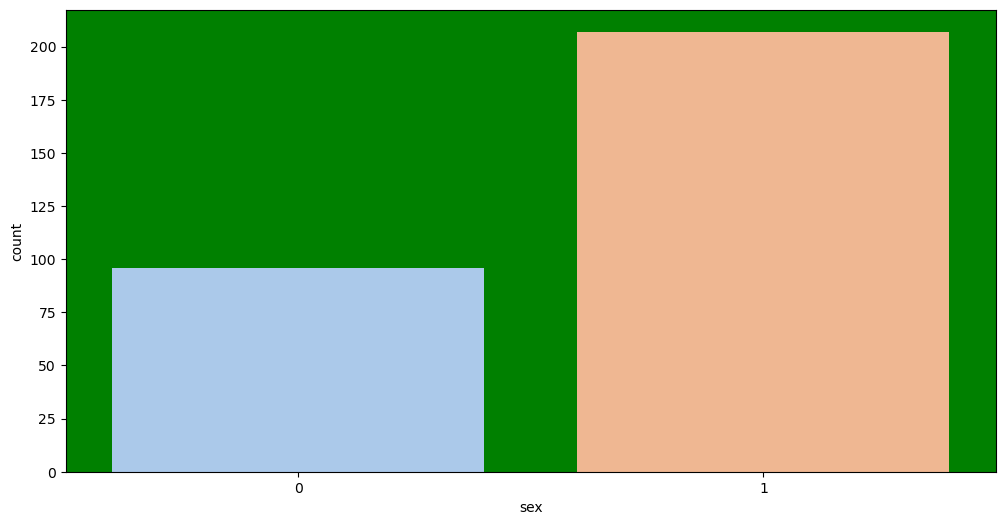

In [10]:
plt.figure(figsize=(12,6))
ax=plt.axes()
ax.set_facecolor("green")
p = sns.countplot(data=df, x="sex", palette='pastel')

Наблюдение:

Количество людей, принадлежащих к половой категории 0, составляет 96, в то время как 1 - 206.

Количество людей в одной категории более чем в два раза больше нуля.

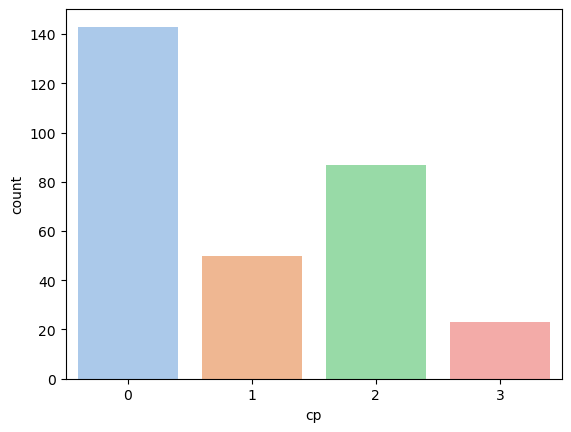

In [11]:
ax=plt.axis()
sns.countplot(x='cp', data=df, palette='pastel')
pass

Наблюдение:

Cp: Тип боли в груди Тип боли в груди

Значение 0: типичная стенокардия

Значение 1: нетипичная стенокардия

Значение 2: боль, не связанная с ангинальной болью

Значение 3: бессимптомно

Люди категории боли в груди '0' имеют самое высокое количество, в то время как количество болей в груди '3' является самым низким

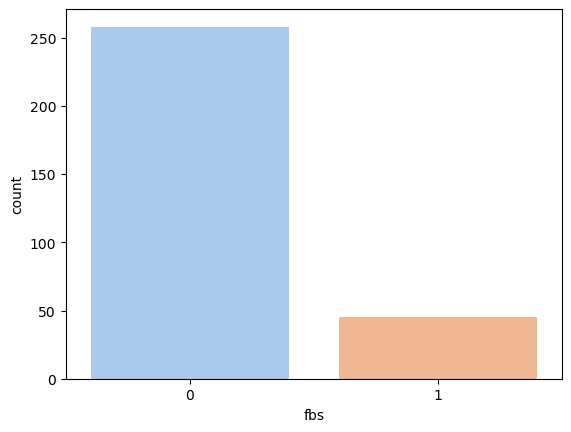

In [12]:
sns.countplot(x='fbs', data=df, palette='pastel')
pass

Наблюдение: Люди категории fbs 1 - это менее 25% людей категории fbs категории 0.

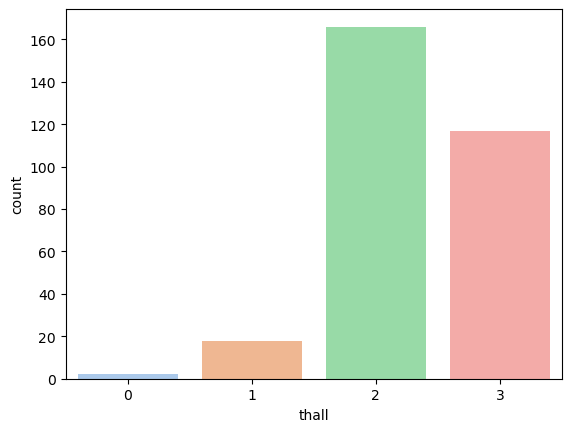

In [13]:
sns.countplot(x='thall', data=df, palette='pastel')
pass

Наблюдение: Максимальный подсчет для типа 2 ( 165) и минимум для типа 0 ( 2).

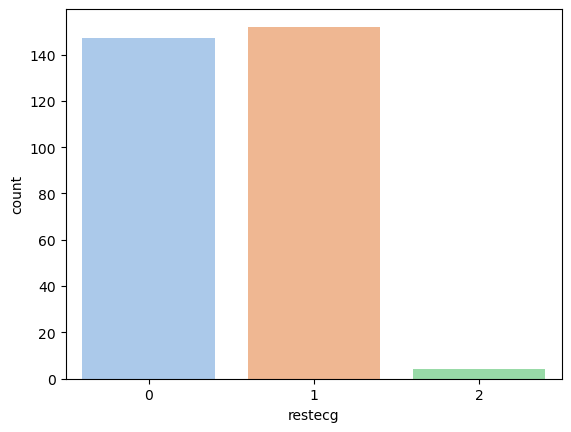

In [14]:
sns.countplot(x='restecg', data=df, palette='pastel')
pass

Наблюдение:

Количество ЭКГ почти одинаково для типов 0 и 1.

Кроме того, это почти ничтожно для типа 2 в сопоставимости с типом 0 и 1.

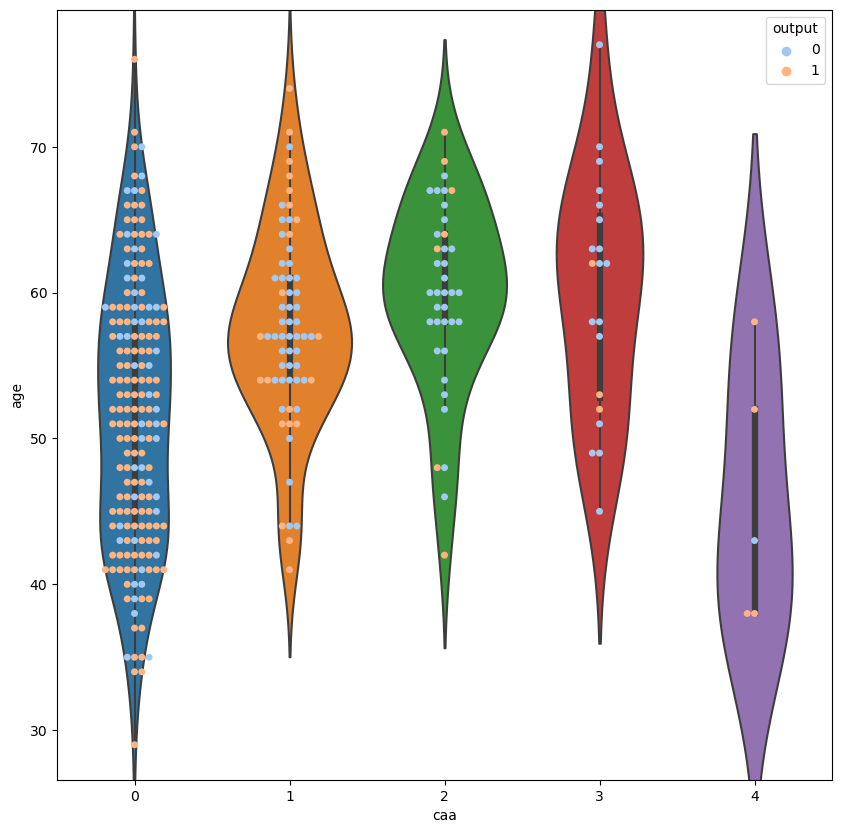

In [15]:
plt.figure(figsize = (10,10))
sns.violinplot(x='caa',y='age',data=df)
sns.swarmplot(x=df['caa'],y=df['age'],hue=df['output'], palette='pastel')
pass

Наблюдение:

Этот swarmplot дает нам много информации.

По данной цифре, люди, принадлежащие к категории caa '0', независимо от их возраста, очень склонны к сердечному приступу.

Хотя очень мало людей, принадлежащих к категории caa '4', но кажется, что около 75% из них получают сердечные приступы.

Люди, принадлежащие к категориям «1», «2» и «3», подвергаются более или менее аналогичному риску.

In [16]:
df.corr().style.background_gradient(cmap='RdYlGn')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Уникальные значения

Подсчет количества уникальных значений и его относительно с их соответствующими наблюдениями между набором данных трэйна и теста

In [17]:
integer_features = ['age','chol','trtbps','cp','thall','exng']
unique_values_train = pd.DataFrame(df[integer_features].nunique())
unique_values_train = unique_values_train.reset_index(drop=False)
unique_values_train.columns = ['Features', 'Count']

unique_values_percent_train = pd.DataFrame(df[integer_features].nunique()/df.shape[0])
unique_values_percent_train = unique_values_percent_train.reset_index(drop=False)
unique_values_percent_train.columns = ['Features', 'Count']

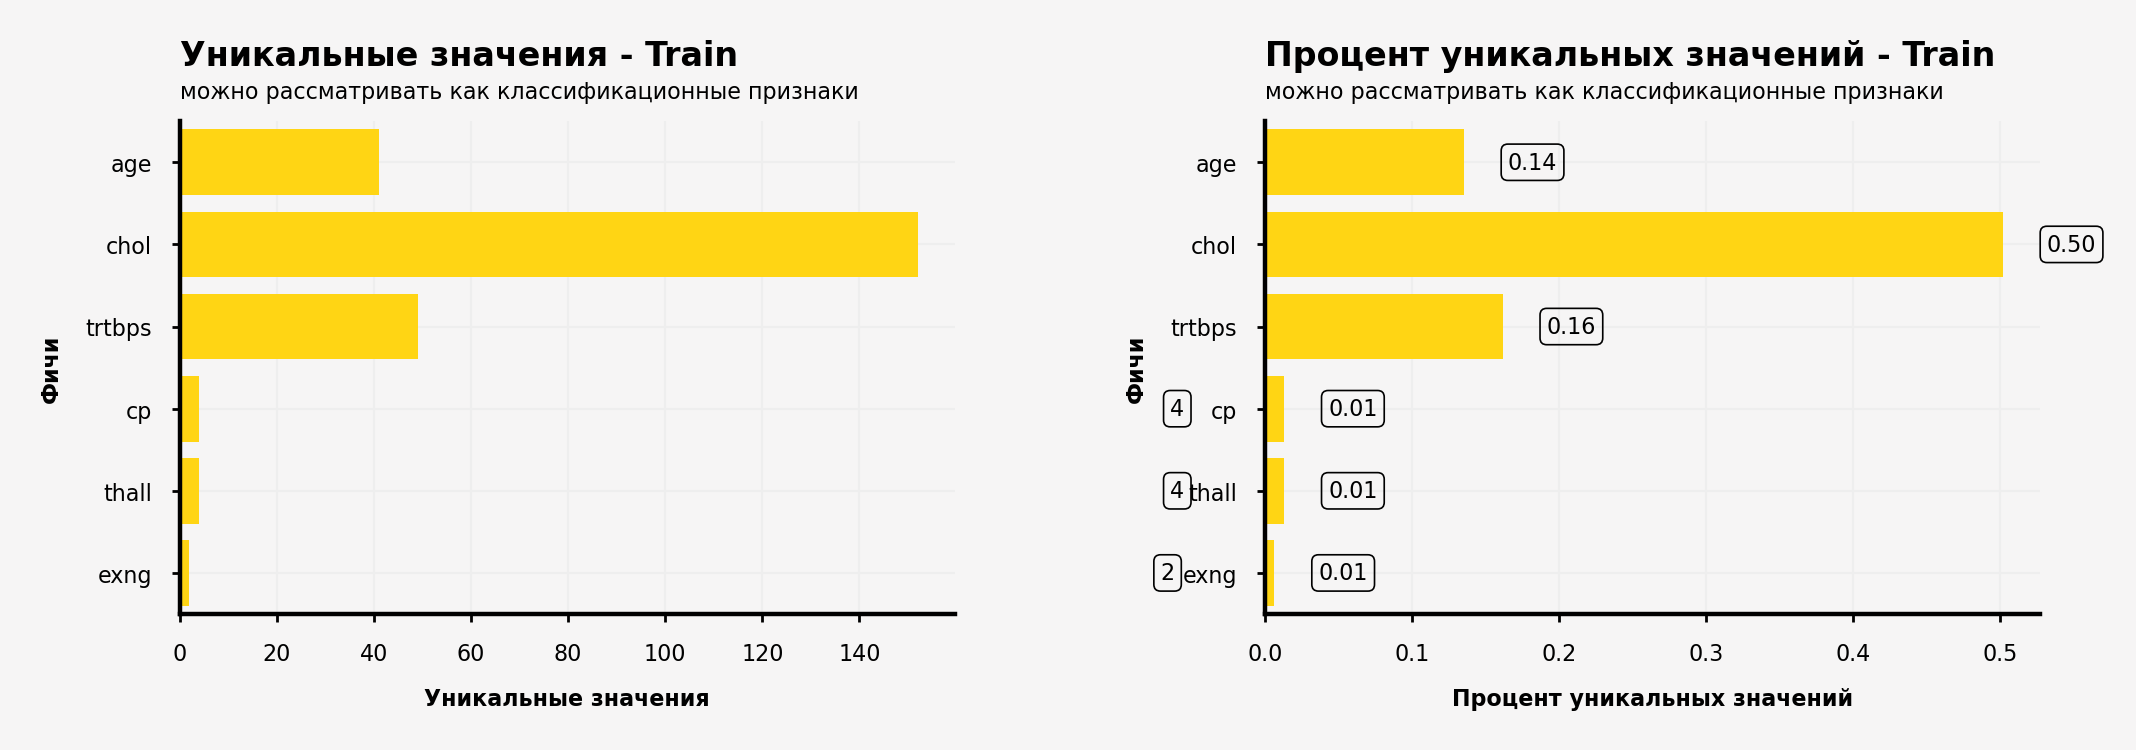

In [18]:
plt.rcParams['figure.dpi'] = 400
fig = plt.figure(figsize=(6, 4), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.4, hspace=0.5)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*6)

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=unique_values_train['Features'], x=unique_values_train['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("Уникальные значения",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Фичи",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -1.5, 'Уникальные значения - Train', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(0, -1, 'можно рассматривать как классификационные признаки', fontsize=4, ha='left', va='top')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# data label
for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 200
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='left', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
    
ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1_sns = sns.barplot(ax=ax1, y=unique_values_percent_train['Features'], x=unique_values_percent_train['Count'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax1_sns.set_xlabel("Процент уникальных значений",fontsize=4, weight='bold')
ax1_sns.set_ylabel("Фичи",fontsize=4, weight='bold')
ax1_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1.text(0, -1.5, 'Процент уникальных значений - Train', fontsize=6, ha='left', va='top', weight='bold')
ax1.text(0, -1, 'можно рассматривать как классификационные признаки', fontsize=4, ha='left', va='top')
# data label
for p in ax1.patches:
    value = f'{p.get_width():.2f}'
    x = p.get_x() + p.get_width() + 0.03
    y = p.get_y() + p.get_height() / 2 
    ax1.text(x, y, value, ha='left', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*6)

Наблюдения:

Похоже, что число можно рассматривать как классификационные особенности, так как уникальные числа малы по сравнению с общим наблюдением, которое можно увидеть в процентах к общему количеству наблюдений.

# Распределение

Показывает распределение по каждой функции, которая доступна в наборе данных трэйн даты.

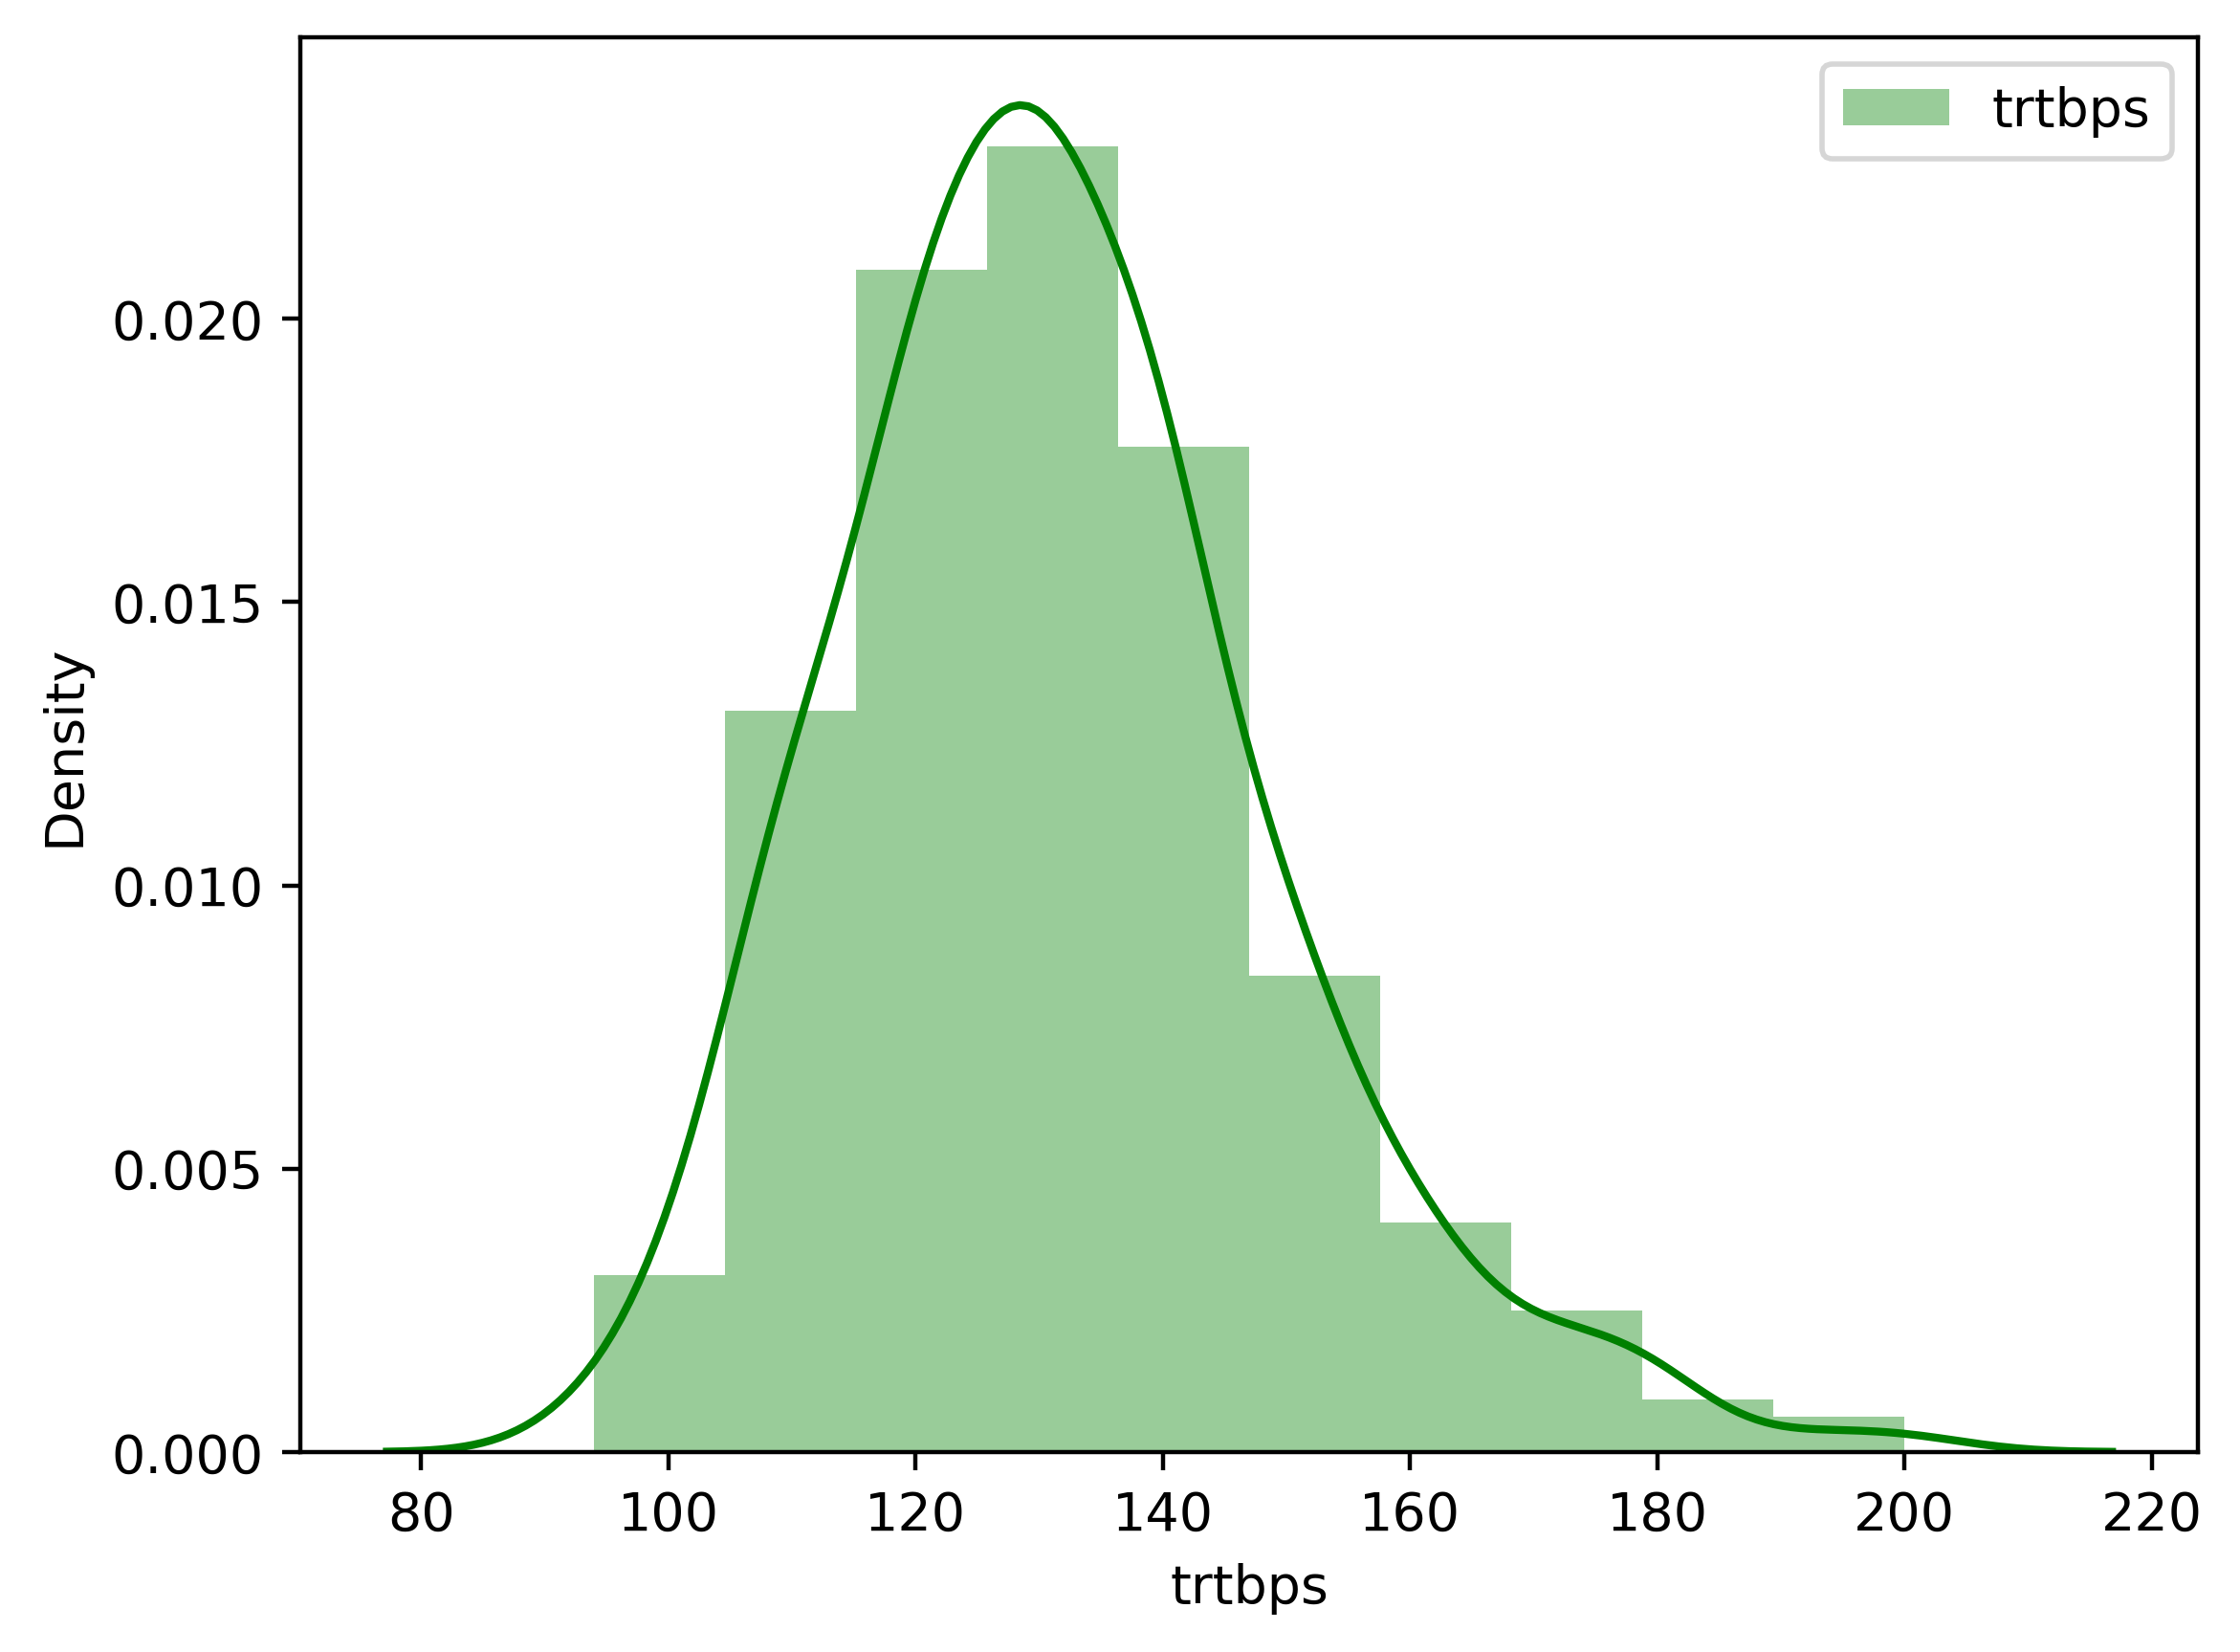

In [19]:
sns.color_palette("pastel")
sns.distplot(df.trtbps, label='trtbps', kde=True, bins=10, color='green')
plt.legend()
pass

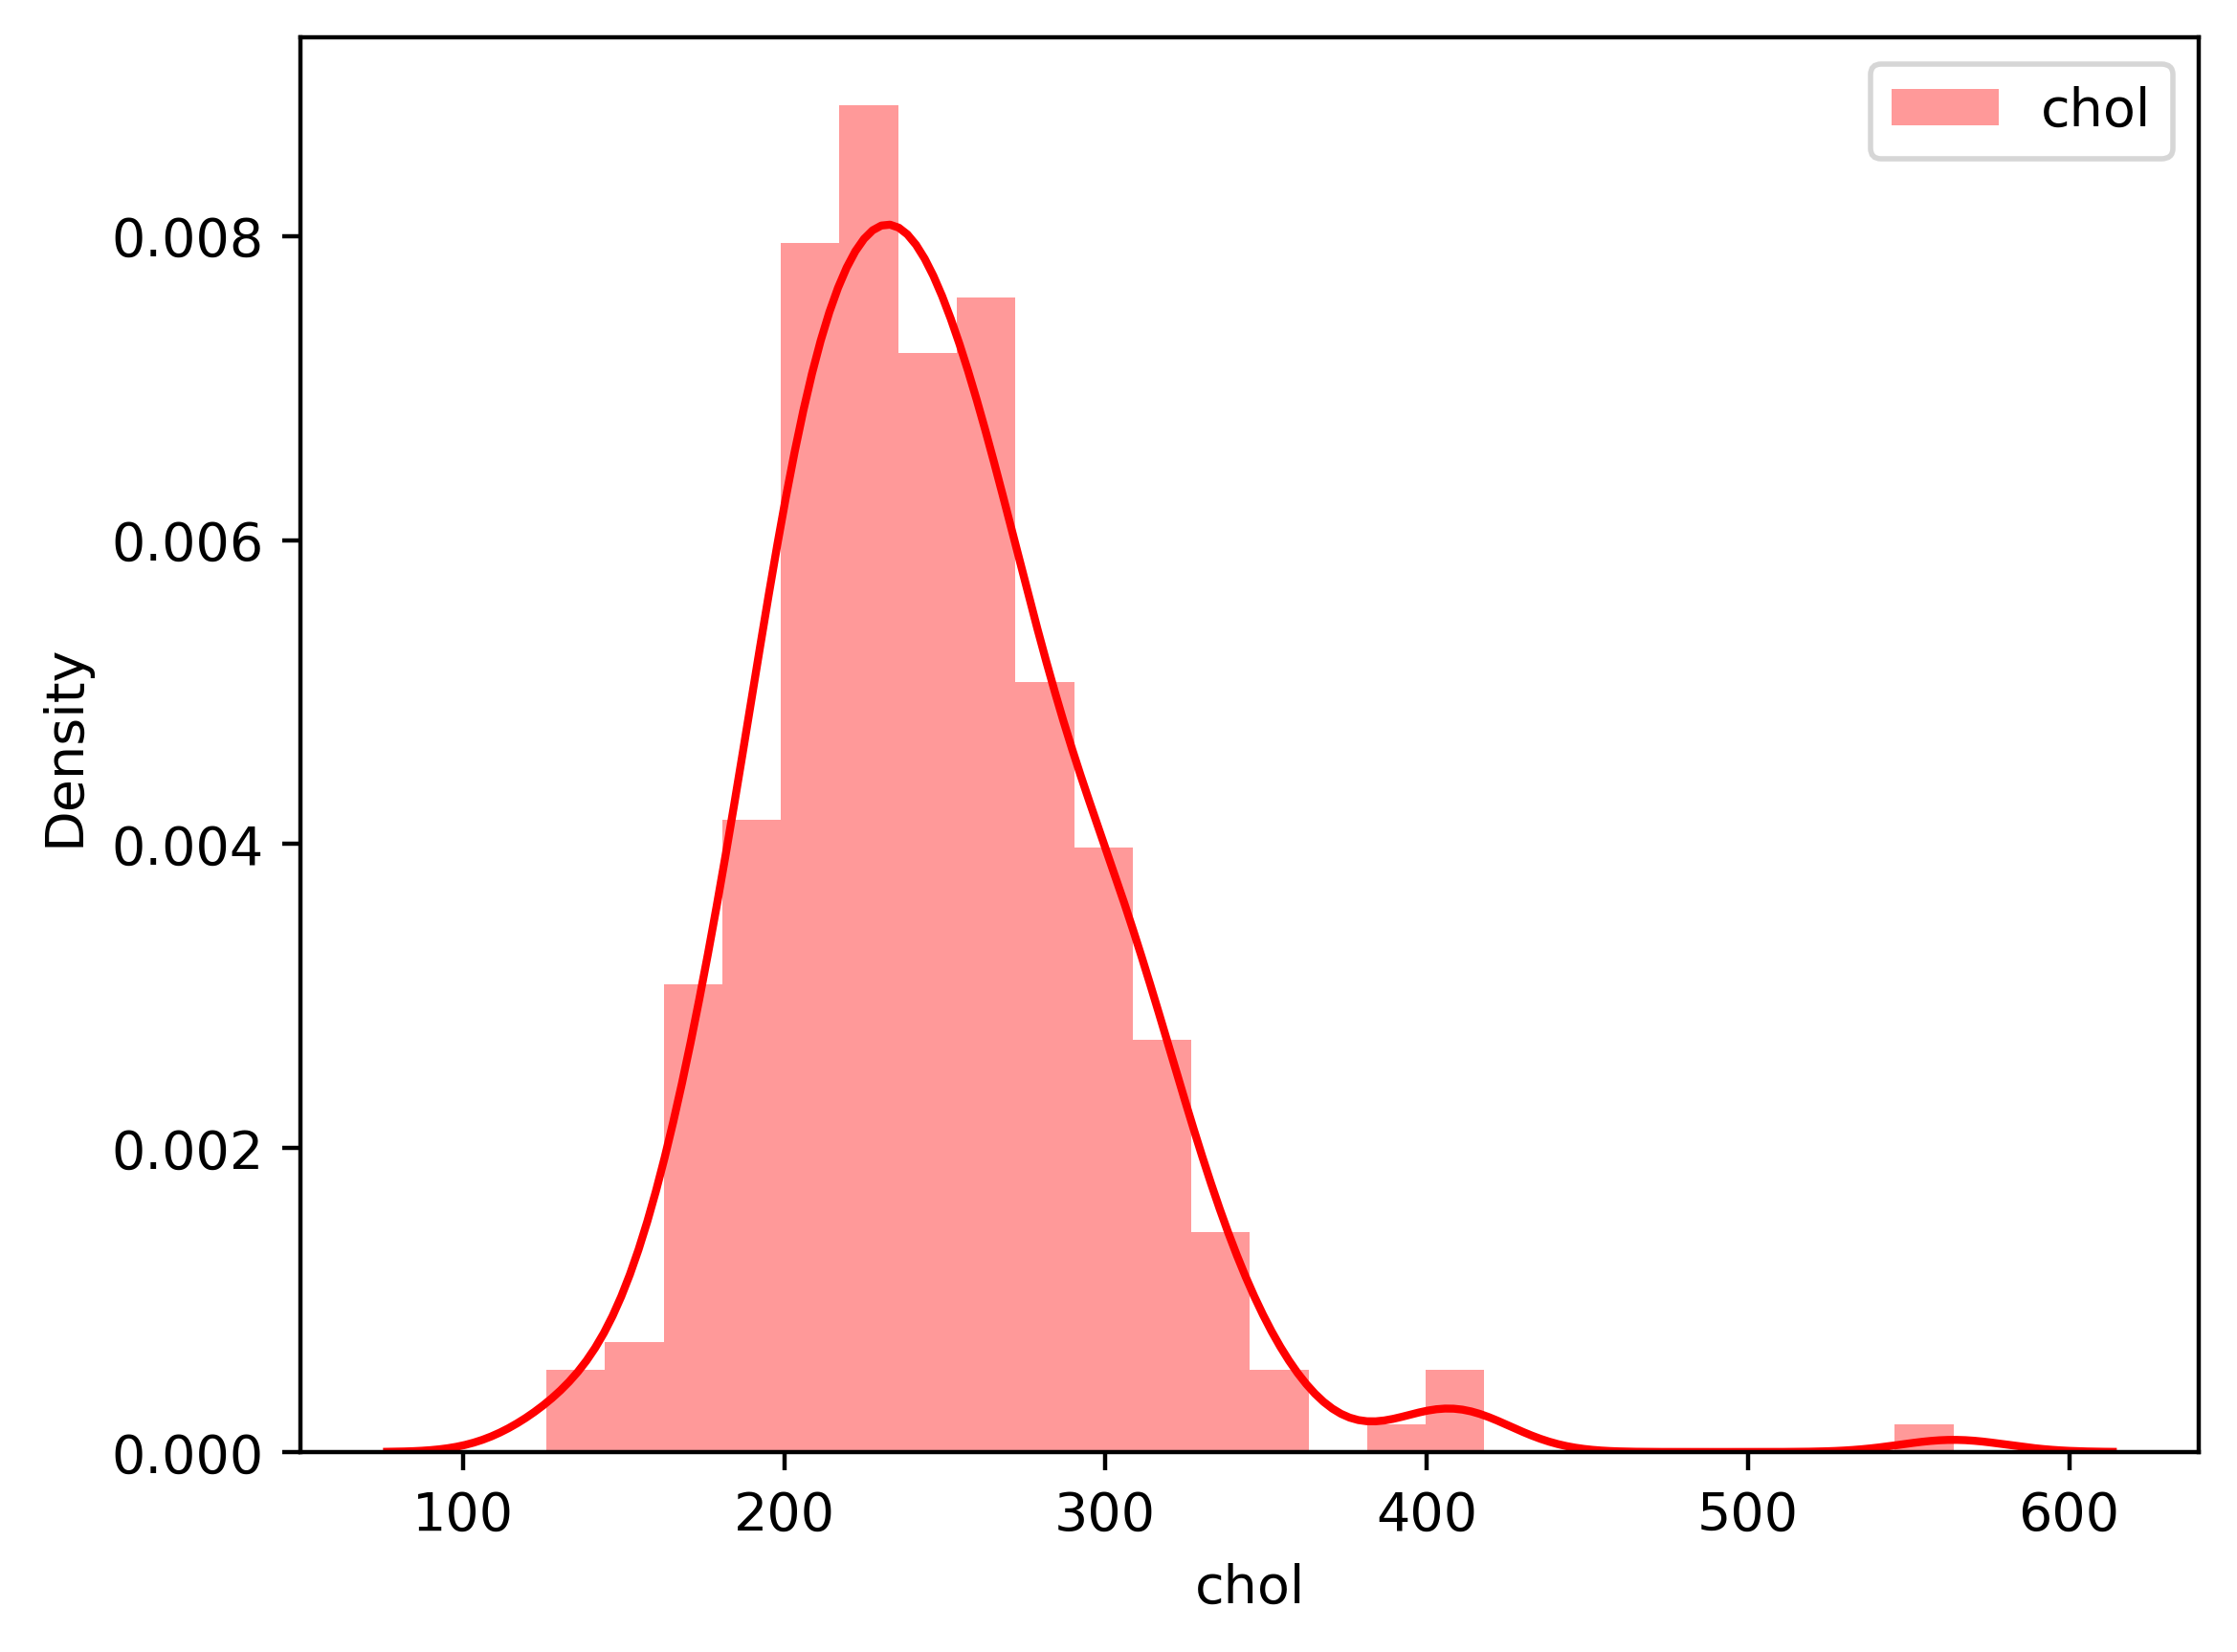

In [20]:
sns.distplot(df.chol, label='chol', kde=True, color='red')
plt.legend()
pass

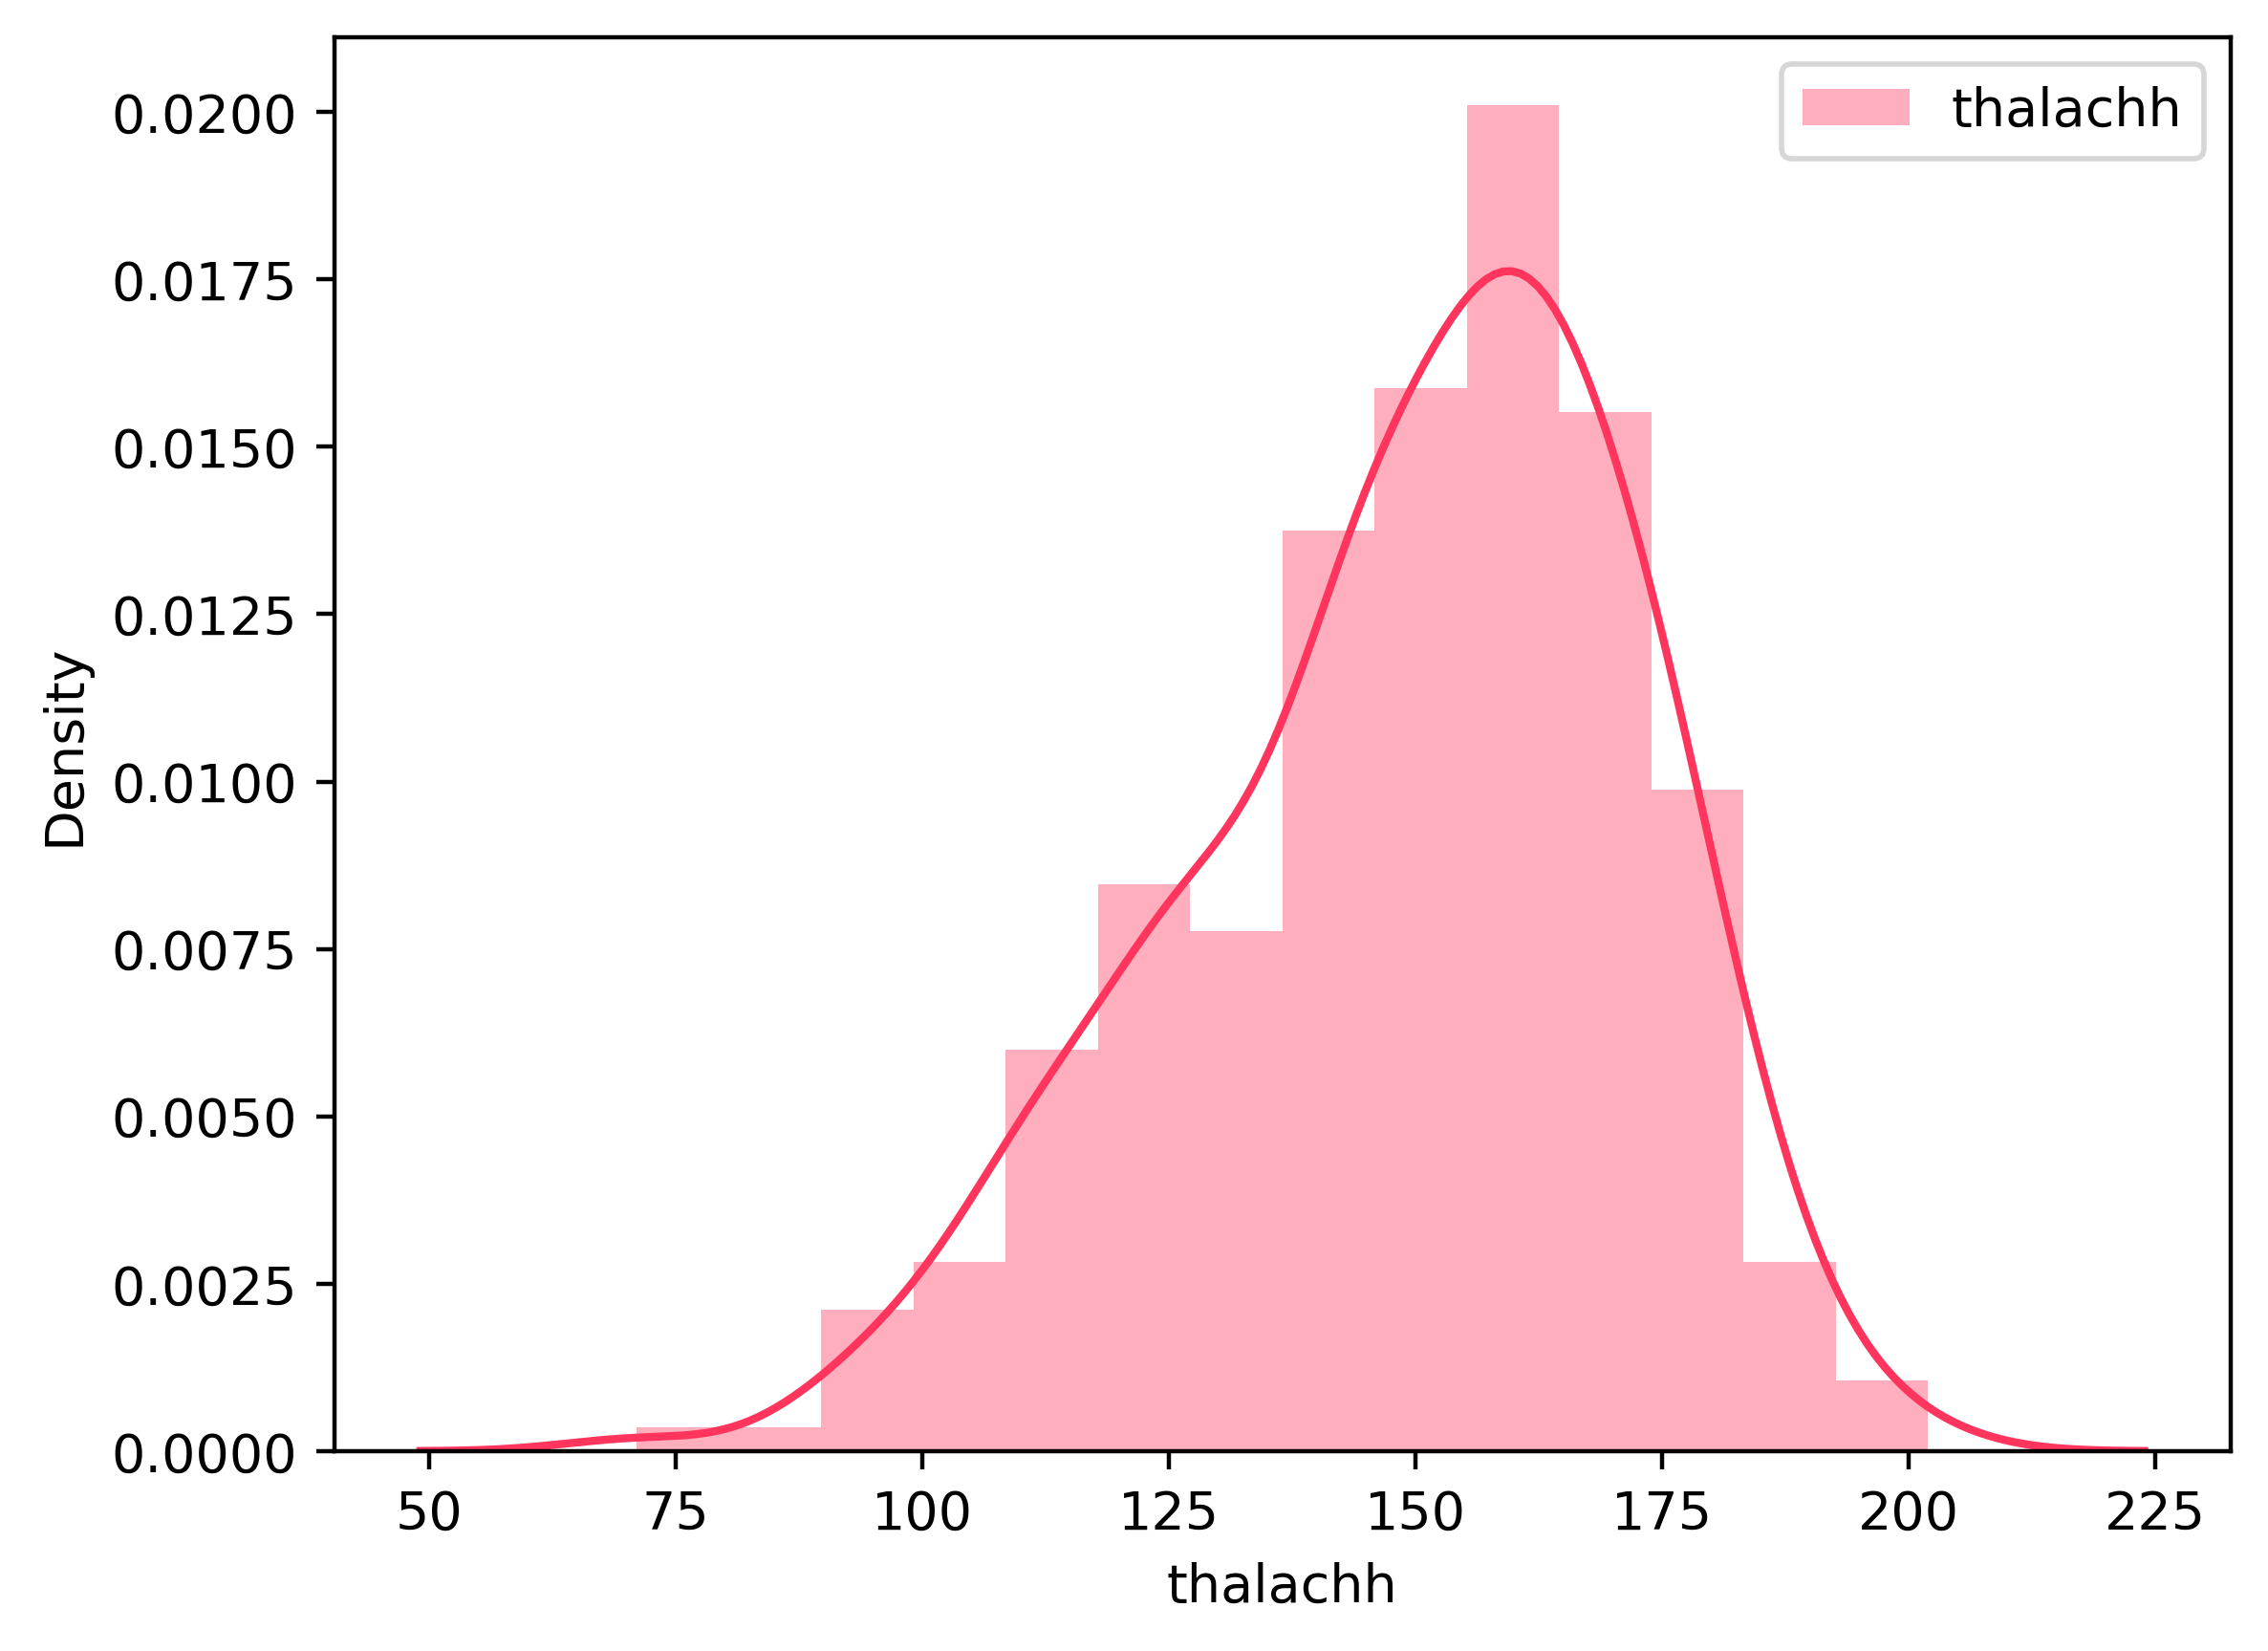

In [21]:
sns.distplot(df['thalachh'],label='thalachh', kde=True )
plt.legend()
pass

Наблюдения:

Trtbps и chol выглядят так, как будто они обычно распределены, с некоторыми выпрямыми сторонами, сильно искаженными вправо.

В случае thalachh данные сильно искажены вправо!

In [22]:
#разбиваемся на X и y

X =df.drop(["output"],axis=1)
y =df["output"]

Использование minmax Scaler для масштабирования данных в том же масштабе

Мы масштабируем данные aal от 0 до 1

In [23]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X[X.columns] = scalerX.fit_transform(X[X.columns])

# Построение моделей

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_pre=ada.predict(X_test)
acc_ada = accuracy_score(y_test,ada_pre)
acc_ada

0.7868852459016393

In [27]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','XGBClassifier']
value = [LogisticRegression(random_state=9), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), xgb.XGBClassifier()]
models = dict(zip(key,value))

In [28]:
predicted =[]

In [29]:
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8360655737704918
KNeighborsClassifier 0.7868852459016393
SVC 0.7868852459016393
DecisionTreeClassifier 0.7540983606557377
RandomForestClassifier 0.8032786885245902
GradientBoostingClassifier 0.7377049180327869
XGBClassifier 0.7868852459016393


<Axes: >

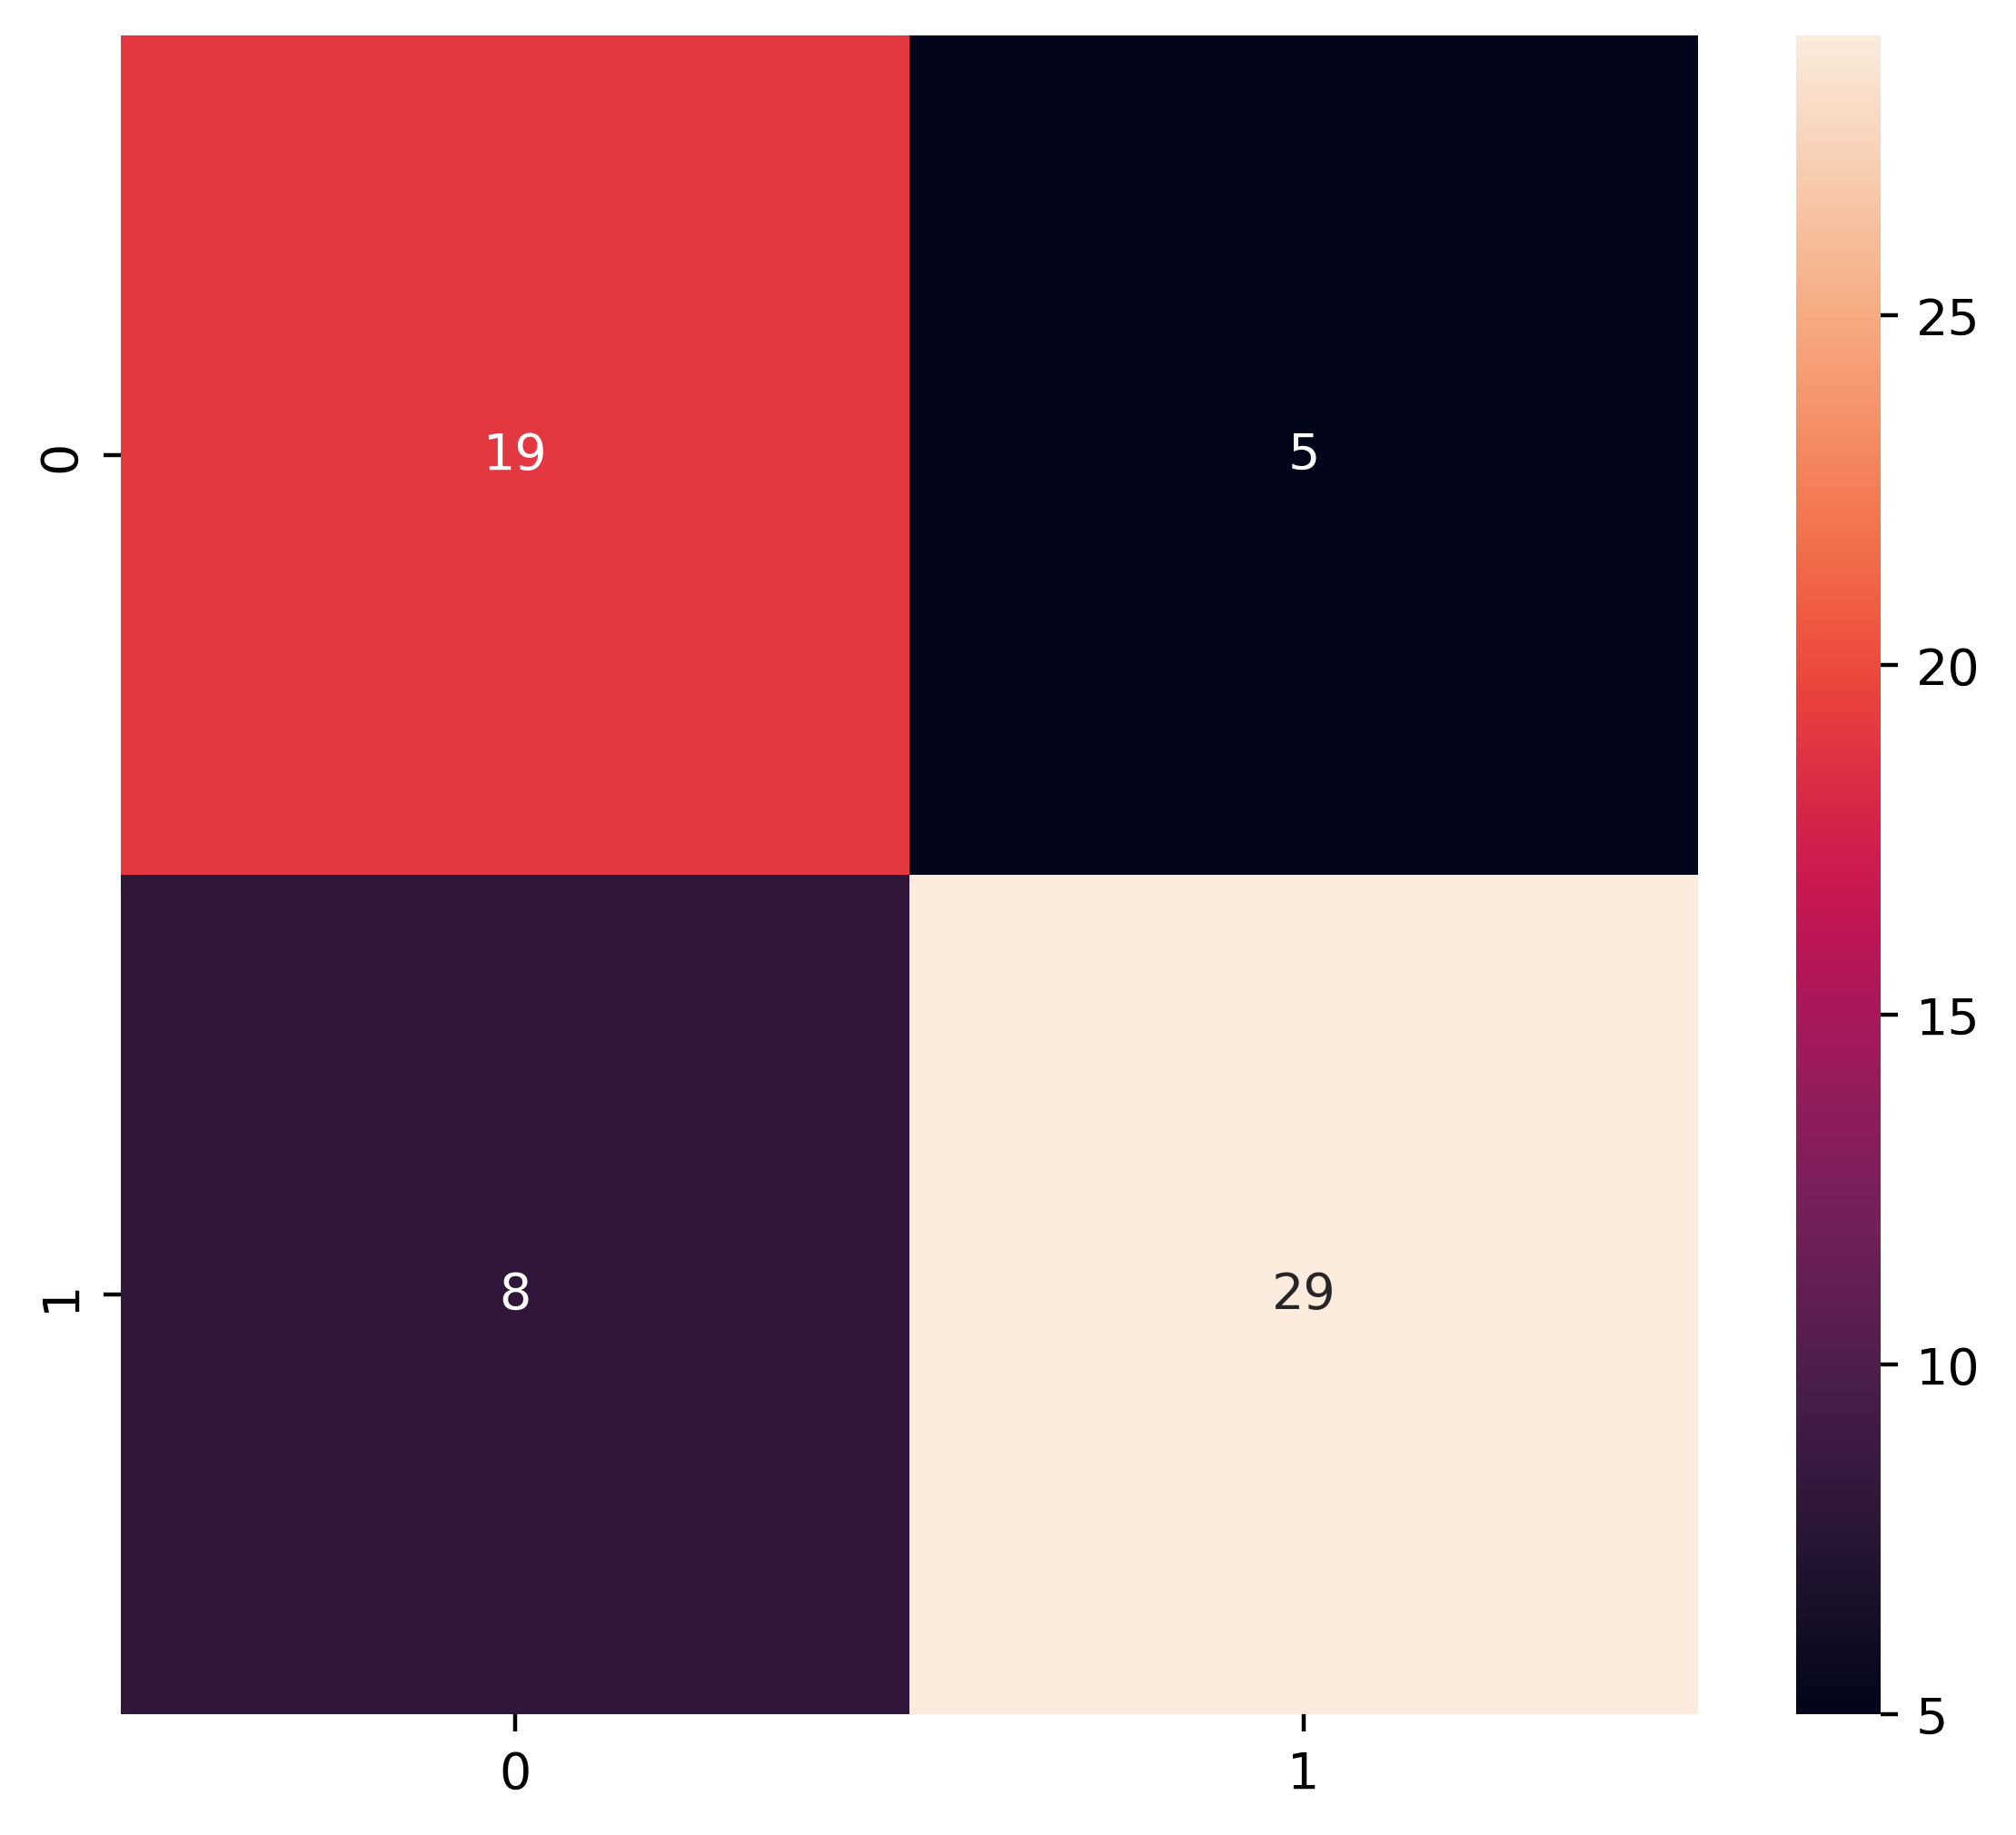

In [30]:
cnn=KNeighborsClassifier()
cnn.fit(X_train,y_train)
cnn_predict = cnn.predict(X_test)
cf_matrix=confusion_matrix(y_test,cnn_predict)
plt.figure(figsize=(7,6))
sns.heatmap(cf_matrix,annot=True,fmt='d')

<Axes: >

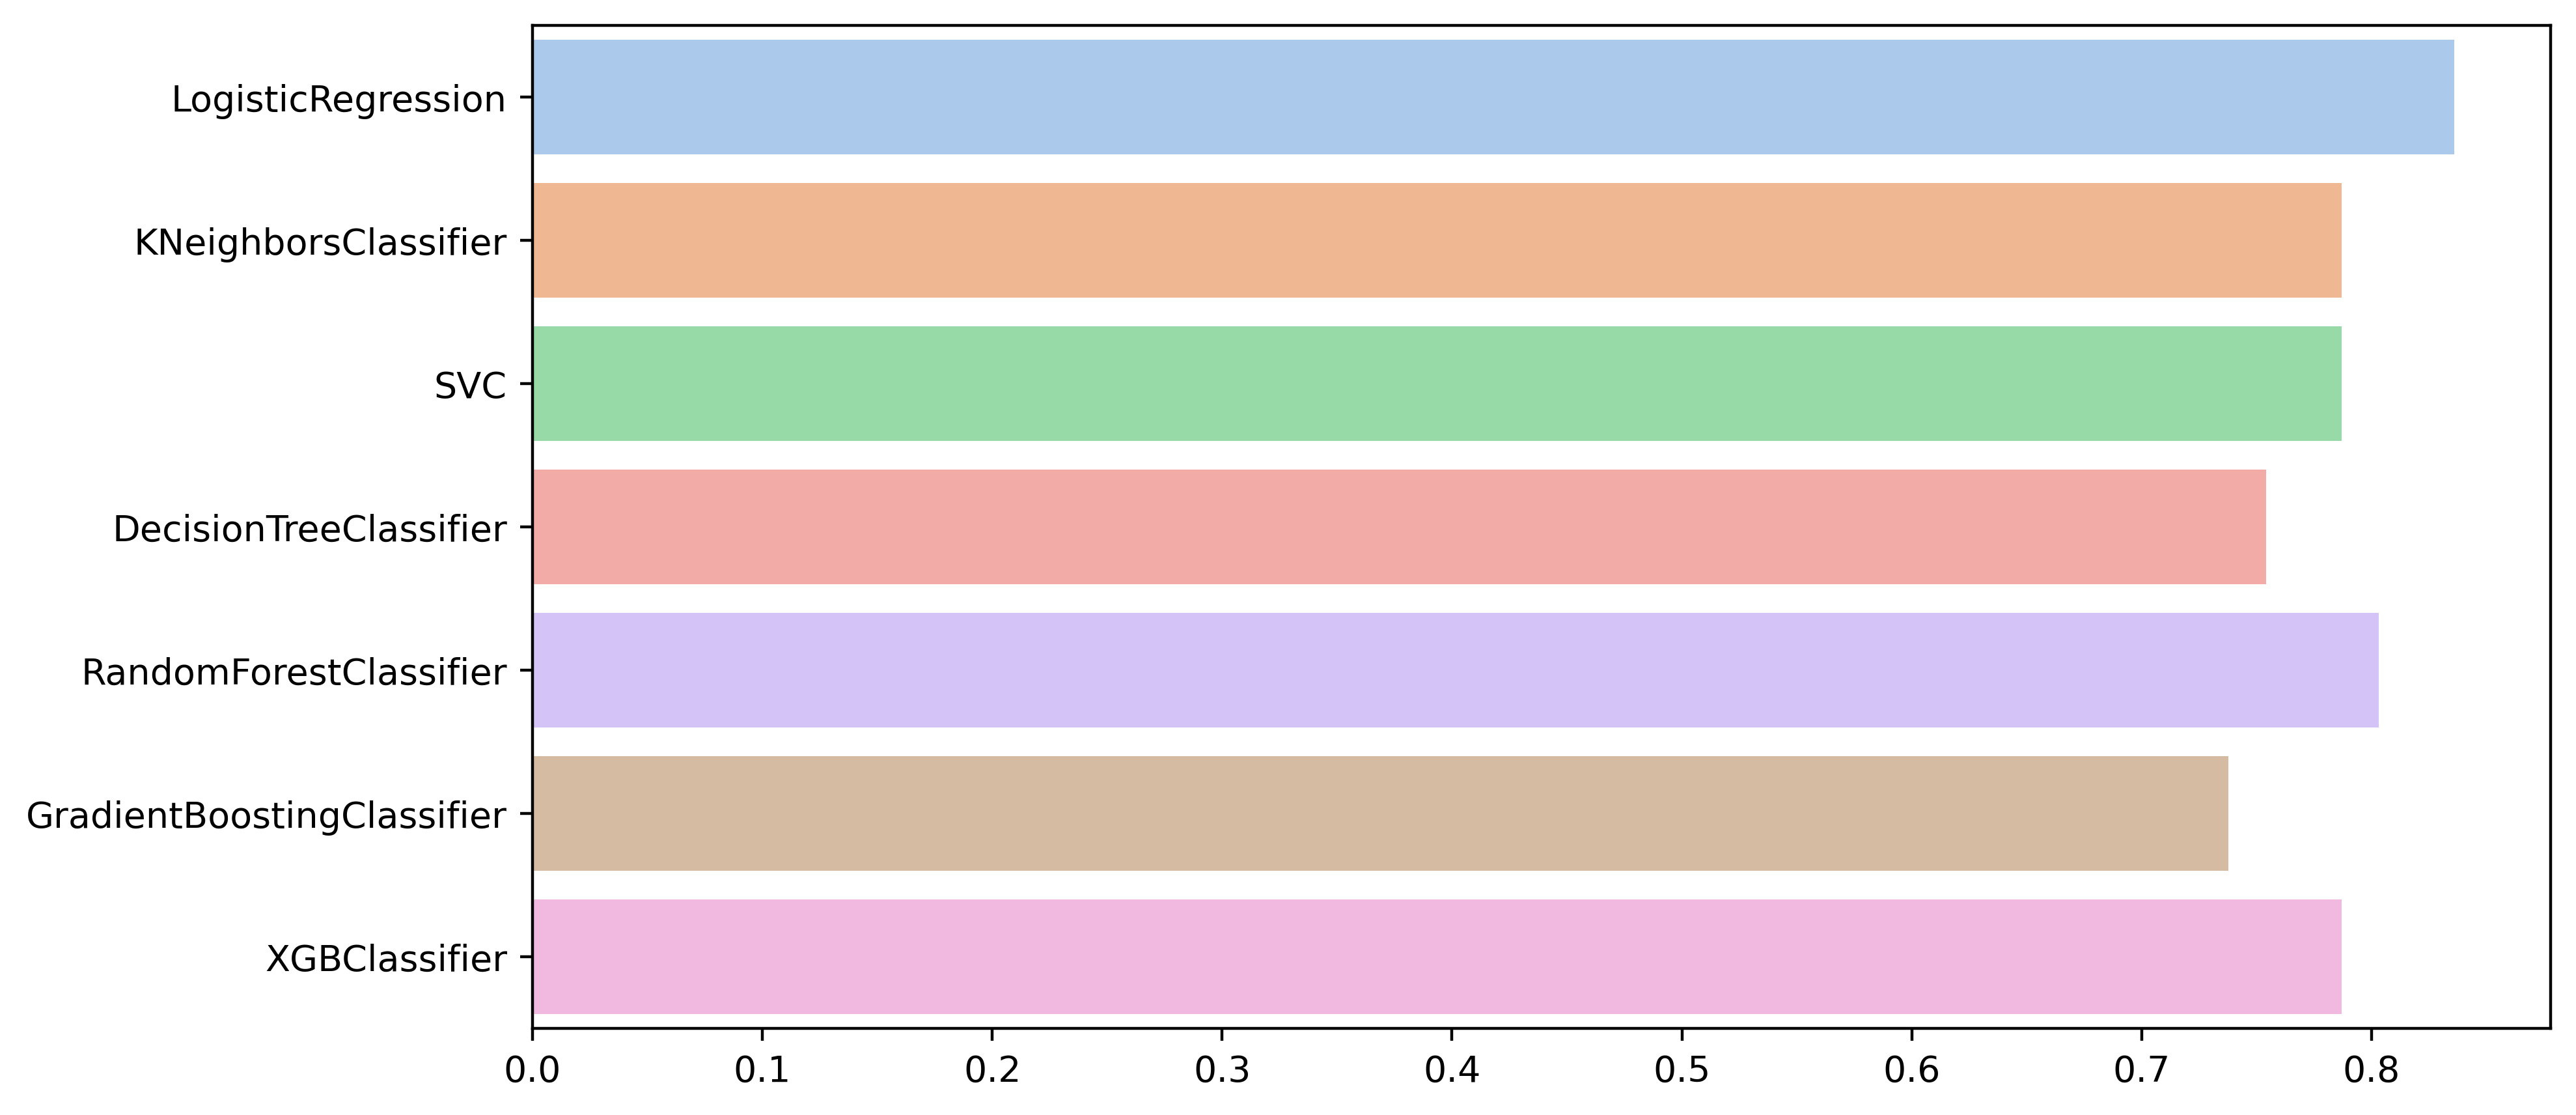

In [31]:
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key, palette='pastel')

Наблюдение:

На рисунке выше мы видим, что модель KNeighborsClassifier дает точность более 80%.

Заключение:

Числовые переменные - никаких отликов не найдено!

Высокое кровяное давление, высокий уровень холестерина и высокая сердечная ритм приводят к высокой вероятности сердечного приступа.

В подсчете целей показалось, что у нас больше шансов на сердечный приступ.

Возраст от 40 до 60 лет имеет высокий шанс сердечного приступа.

У мужского пола больше шансов на сердечный приступ по сравнению с женским.

Высококоррелированные факторы в этом наборе данных:

Возраст и trtbps (коровь крови)
Возраст и уровень холестерина (уровень холестерина)